In [36]:
%%capture
!pip install pycaret

## with 200 samples

In [1]:
import pandas as pd
import numpy as np

FILE_PATH = '../data/topological_analysis-modified.csv'
df = pd.read_csv(FILE_PATH)
df

,Unnamed: 0,id,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,...,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity,label
0,0,8619053,78,905,0.301365,0,22,0.682941,0.894418,12,...,0.121950,0.008936,0.0,0.0,0.0,0.000000,0.126807,0.009004,False,ai
1,1,8719964,78,1014,0.337662,0,23,0.644529,0.884952,16,...,0.132920,0.008515,0.0,0.0,0.0,0.002998,0.131943,0.008522,False,ai
2,2,8703870,71,932,0.375050,0,25,0.714891,0.902158,7,...,0.148027,0.008803,0.0,0.0,0.0,0.001464,0.147678,0.008792,False,ai
3,3,8751867,71,883,0.355332,0,22,0.687805,0.889368,9,...,0.104146,0.009057,0.0,0.0,0.0,0.004335,0.102705,0.009083,False,ai
4,4,8758842,137,1964,0.210820,0,29,0.598396,0.892383,56,...,0.188770,0.005653,0.0,0.0,0.0,0.000000,0.186469,0.005619,False,ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,8723523,96,1207,0.264693,0,34,0.747049,0.947891,9,...,0.193186,0.008310,0.0,0.0,0.0,0.000000,0.193790,0.008264,False,human
1996,1996,8616587,139,2153,0.224481,0,32,0.568339,0.886476,47,...,0.150328,0.005585,0.0,0.0,0.0,0.000000,0.148329,0.005584,False,human
1997,1997,8704408,112,1434,0.230695,0,26,0.640858,0.908929,14,...,0.197323,0.007166,0.0,0.0,0.0,0.000000,0.196277,0.007177,False,human
1998,1998,8612755,84,1723,0.494263,0,41,0.809736,0.922427,6,...,0.095988,0.005975,0.0,0.0,0.0,0.000000,0.098080,0.006076,False,human


In [2]:
# all columns except the label
X = df.drop(columns=['label']).iloc[:, 2:]
y = df['label']
X.head()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.000000,0.121950,0.008936,0.0,0.0,0.0,0.000000,0.126807,0.009004,False
1,78,1014,0.337662,0,23,0.644529,0.884952,16,1,1,...,0.002615,0.132920,0.008515,0.0,0.0,0.0,0.002998,0.131943,0.008522,False
2,71,932,0.375050,0,25,0.714891,0.902158,7,1,1,...,0.001453,0.148027,0.008803,0.0,0.0,0.0,0.001464,0.147678,0.008792,False
3,71,883,0.355332,0,22,0.687805,0.889368,9,1,1,...,0.004230,0.104146,0.009057,0.0,0.0,0.0,0.004335,0.102705,0.009083,False
4,137,1964,0.210820,0,29,0.598396,0.892383,56,2,2,...,0.000000,0.188770,0.005653,0.0,0.0,0.0,0.000000,0.186469,0.005619,False


In [3]:
X.tail()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity
1995,96,1207,0.264693,0,34,0.747049,0.947891,9,1,1,...,0.0,0.193186,0.008310,0.0,0.0,0.0,0.0,0.193790,0.008264,False
1996,139,2153,0.224481,0,32,0.568339,0.886476,47,1,1,...,0.0,0.150328,0.005585,0.0,0.0,0.0,0.0,0.148329,0.005584,False
1997,112,1434,0.230695,0,26,0.640858,0.908929,14,1,1,...,0.0,0.197323,0.007166,0.0,0.0,0.0,0.0,0.196277,0.007177,False
1998,84,1723,0.494263,0,41,0.809736,0.922427,6,1,1,...,0.0,0.095988,0.005975,0.0,0.0,0.0,0.0,0.098080,0.006076,False
1999,97,1428,0.306701,0,32,0.658446,0.889961,26,1,1,...,0.0,0.130735,0.007133,0.0,0.0,0.0,0.0,0.130363,0.007214,False


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'nodes', 'edges', 'density', 'isolated_nodes',
       'core_number', 'global_cc', 'approx_avg_local_cc', 'max_cliques',
       'connected_components', 'strongly_connected_components',
       'degree_assortativity_coefficient',
       'degree_pearson_correlation_coefficient', 'avg_shortest_path_length',
       'avg_neighbour_degree', 'avg_degree_connectivity',
       'degree_centrality_min', 'degree_centrality_1qr',
       'degree_centrality_median', 'degree_centrality_3qr',
       'degree_centrality_max', 'degree_centrality_avg',
       'eigenvector_centrality_min', 'eigenvector_centrality_1qr',
       'eigenvector_centrality_median', 'eigenvector_centrality_3qr',
       'eigenvector_centrality_max', 'eigenvector_centrality_avg',
       'pagerank_min', 'pagerank_1qr', 'pagerank_median', 'pagerank_3qr',
       'pagerank_max', 'pagerank_avg', 'betweenness_centrality_min',
       'betweenness_centrality_1qr', 'betweenness_centrality_median',
       'betweenness_

In [13]:
y.head()

0    ai
1    ai
2    ai
3    ai
4    ai
Name: label, dtype: object

In [11]:
X = X.dropna(axis=1)
X.head()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.000000,0.121950,0.008936,0.0,0.0,0.0,0.000000,0.126807,0.009004,False
1,78,1014,0.337662,0,23,0.644529,0.884952,16,1,1,...,0.002615,0.132920,0.008515,0.0,0.0,0.0,0.002998,0.131943,0.008522,False
2,71,932,0.375050,0,25,0.714891,0.902158,7,1,1,...,0.001453,0.148027,0.008803,0.0,0.0,0.0,0.001464,0.147678,0.008792,False
3,71,883,0.355332,0,22,0.687805,0.889368,9,1,1,...,0.004230,0.104146,0.009057,0.0,0.0,0.0,0.004335,0.102705,0.009083,False
4,137,1964,0.210820,0,29,0.598396,0.892383,56,2,2,...,0.000000,0.188770,0.005653,0.0,0.0,0.0,0.000000,0.186469,0.005619,False


In [12]:
X.shape

(2000, 46)

In [14]:
X.columns

Index(['nodes', 'edges', 'density', 'isolated_nodes', 'core_number',
       'global_cc', 'approx_avg_local_cc', 'max_cliques',
       'connected_components', 'strongly_connected_components',
       'degree_assortativity_coefficient',
       'degree_pearson_correlation_coefficient', 'avg_shortest_path_length',
       'avg_neighbour_degree', 'avg_degree_connectivity',
       'degree_centrality_min', 'degree_centrality_1qr',
       'degree_centrality_median', 'degree_centrality_3qr',
       'degree_centrality_max', 'degree_centrality_avg',
       'eigenvector_centrality_min', 'eigenvector_centrality_1qr',
       'eigenvector_centrality_median', 'eigenvector_centrality_3qr',
       'eigenvector_centrality_max', 'eigenvector_centrality_avg',
       'pagerank_min', 'pagerank_1qr', 'pagerank_median', 'pagerank_3qr',
       'pagerank_max', 'pagerank_avg', 'betweenness_centrality_min',
       'betweenness_centrality_1qr', 'betweenness_centrality_median',
       'betweenness_centrality_3qr', 'be

In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 46), (400, 46), (1600,), (400,))

In [17]:
pip install pycaret

  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade pycaret


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --upgrade scikit-learn==1.3.0


  Using cached scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.2.0 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.3.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [20]:
from pycaret.classification import *
s = setup(pd.concat([X, y], axis=1), target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"ai: 0, human: 1"
4,Original data shape,"(2000, 47)"
5,Transformed data shape,"(2000, 47)"
6,Transformed train set shape,"(1400, 47)"
7,Transformed test set shape,"(600, 47)"
8,Numeric features,45
9,Preprocess,True


In [27]:
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8586,0.9219,0.8586,0.8616,0.8583,0.7171,0.7202,0.1640
gbc,Gradient Boosting Classifier,0.8557,0.9228,0.8557,0.8582,0.8555,0.7114,0.7139,0.4320
et,Extra Trees Classifier,0.8557,0.9228,0.8557,0.8594,0.8554,0.7114,0.7150,0.0590
lightgbm,Light Gradient Boosting Machine,0.8521,0.9219,0.8521,0.8554,0.8518,0.7043,0.7075,0.4590
ada,Ada Boost Classifier,0.8429,0.9036,0.8429,0.8469,0.8423,0.6857,0.6897,0.1720
lda,Linear Discriminant Analysis,0.8364,0.9065,0.8364,0.8413,0.8359,0.6729,0.6777,0.0140
ridge,Ridge Classifier,0.8336,0.0000,0.8336,0.8393,0.8329,0.6671,0.6728,0.0080
lr,Logistic Regression,0.8250,0.9011,0.8250,0.8283,0.8246,0.6500,0.6533,0.0590
dt,Decision Tree Classifier,0.7871,0.7871,0.7871,0.7907,0.7865,0.5743,0.5778,0.0160
nb,Naive Bayes,0.7850,0.8995,0.7850,0.8183,0.7790,0.5700,0.6021,0.0080


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [22]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [23]:
best.s

AttributeError: 'RandomForestClassifier' object has no attribute 's'

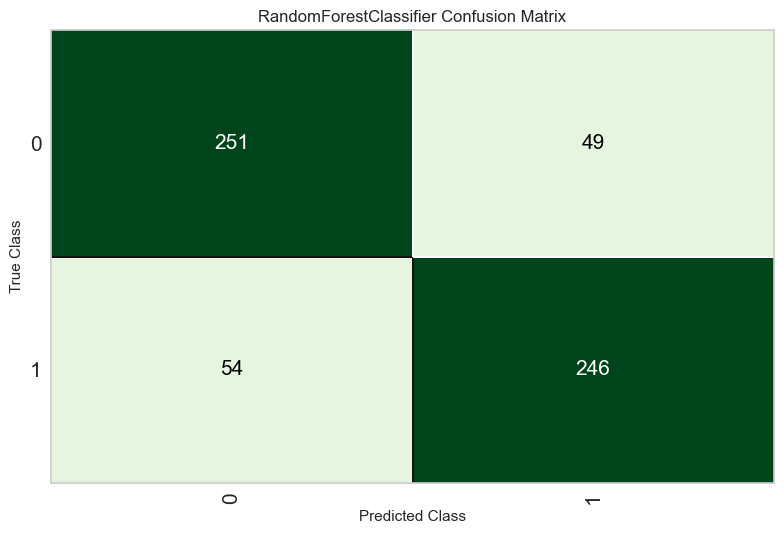

In [28]:
plot_model(best, plot = 'confusion_matrix')

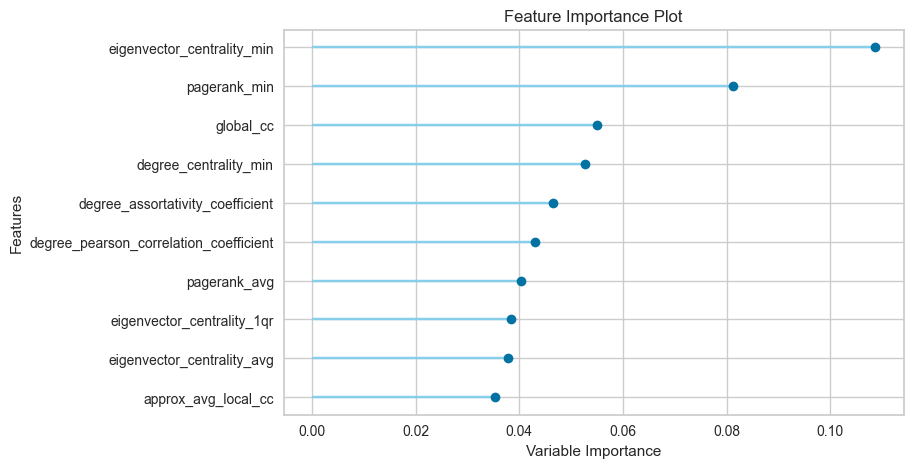

In [29]:
plot_model(best, plot = 'feature')

In [26]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [41]:
model = create_model('lightgbm')

# Save the model
save_model(model, '../models/lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8843,0.8000,0.8002,0.8000,0.6000,0.6002
1,0.8357,0.9127,0.8357,0.8358,0.8357,0.6714,0.6715
2,0.8786,0.9386,0.8786,0.8805,0.8784,0.7571,0.7591
3,0.8429,0.9233,0.8429,0.8571,0.8413,0.6857,0.6999
4,0.8357,0.9049,0.8357,0.8363,0.8356,0.6714,0.6720
5,0.8643,0.9192,0.8643,0.8650,0.8642,0.7286,0.7292
6,0.8857,0.9622,0.8857,0.8938,0.8851,0.7714,0.7794
7,0.8429,0.8914,0.8429,0.8474,0.8423,0.6857,0.6902
8,0.8786,0.9608,0.8786,0.8793,0.8785,0.7571,0.7578


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['nodes', 'edges', 'density',
                                              'isolated_nodes', 'core_number',
                                              'global_cc', 'approx_avg_local_cc',
                                              'max_cliques',
                                              'connected_components',
                                              'strongly_co...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                               

In [37]:
model = load_model('../models/lightgbm')

Transformation Pipeline and Model Successfully Loaded


In [38]:
print(model)

Pipeline(memory=FastMemory(location=/var/folders/p1/31_b601n2h14ppg2ltpvh_480000gn/T/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['nodes', 'edges', 'density',
                                             'isolated_nodes', 'core_number',
                                             'global_cc', 'approx_avg_loca...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                         

In [63]:
X.columns

Index(['nodes', 'edges', 'density', 'isolated_nodes', 'core_number',
       'global_cc', 'approx_avg_local_cc', 'max_cliques',
       'connected_components', 'strongly_connected_components',
       'degree_assortativity_coefficient',
       'degree_pearson_correlation_coefficient', 'avg_shortest_path_length',
       'avg_neighbour_degree', 'avg_degree_connectivity',
       'degree_centrality_min', 'degree_centrality_1qr',
       'degree_centrality_median', 'degree_centrality_3qr',
       'degree_centrality_max', 'degree_centrality_avg',
       'eigenvector_centrality_min', 'eigenvector_centrality_1qr',
       'eigenvector_centrality_median', 'eigenvector_centrality_3qr',
       'eigenvector_centrality_max', 'eigenvector_centrality_avg',
       'pagerank_min', 'pagerank_1qr', 'pagerank_median', 'pagerank_3qr',
       'pagerank_max', 'pagerank_avg', 'betweenness_centrality_min',
       'betweenness_centrality_1qr', 'betweenness_centrality_median',
       'betweenness_centrality_3qr', 'be

In [64]:
d = pd.DataFrame(([list(X.iloc[0,:])]), columns=X.columns)
d

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.0,0.122647,0.008966,0.0,0.0,0.0,0.0,0.128225,0.008991,False


In [65]:
predict_model(model,data=d)


,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity,prediction_label,prediction_score
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.008966,0.0,0.0,0.0,0.0,0.128225,0.008991,False,ai,1.0


## with 2000 samples

In [30]:
import pandas as pd
import numpy as np

FILE_PATH = '../data/topological_analysis-modified.csv'
df = pd.read_csv(FILE_PATH)
df

,Unnamed: 0,id,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,...,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity,label
0,0,8619053,78,905,0.301365,0,22,0.682941,0.894418,12,...,0.121950,0.008936,0.0,0.0,0.0,0.000000,0.126807,0.009004,False,ai
1,1,8719964,78,1014,0.337662,0,23,0.644529,0.884952,16,...,0.132920,0.008515,0.0,0.0,0.0,0.002998,0.131943,0.008522,False,ai
2,2,8703870,71,932,0.375050,0,25,0.714891,0.902158,7,...,0.148027,0.008803,0.0,0.0,0.0,0.001464,0.147678,0.008792,False,ai
3,3,8751867,71,883,0.355332,0,22,0.687805,0.889368,9,...,0.104146,0.009057,0.0,0.0,0.0,0.004335,0.102705,0.009083,False,ai
4,4,8758842,137,1964,0.210820,0,29,0.598396,0.892383,56,...,0.188770,0.005653,0.0,0.0,0.0,0.000000,0.186469,0.005619,False,ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,8723523,96,1207,0.264693,0,34,0.747049,0.947891,9,...,0.193186,0.008310,0.0,0.0,0.0,0.000000,0.193790,0.008264,False,human
1996,1996,8616587,139,2153,0.224481,0,32,0.568339,0.886476,47,...,0.150328,0.005585,0.0,0.0,0.0,0.000000,0.148329,0.005584,False,human
1997,1997,8704408,112,1434,0.230695,0,26,0.640858,0.908929,14,...,0.197323,0.007166,0.0,0.0,0.0,0.000000,0.196277,0.007177,False,human
1998,1998,8612755,84,1723,0.494263,0,41,0.809736,0.922427,6,...,0.095988,0.005975,0.0,0.0,0.0,0.000000,0.098080,0.006076,False,human


In [31]:
# all columns except the label
X = df.drop(columns=['label']).iloc[:, 2:]
y = df['label']
X.head()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.000000,0.121950,0.008936,0.0,0.0,0.0,0.000000,0.126807,0.009004,False
1,78,1014,0.337662,0,23,0.644529,0.884952,16,1,1,...,0.002615,0.132920,0.008515,0.0,0.0,0.0,0.002998,0.131943,0.008522,False
2,71,932,0.375050,0,25,0.714891,0.902158,7,1,1,...,0.001453,0.148027,0.008803,0.0,0.0,0.0,0.001464,0.147678,0.008792,False
3,71,883,0.355332,0,22,0.687805,0.889368,9,1,1,...,0.004230,0.104146,0.009057,0.0,0.0,0.0,0.004335,0.102705,0.009083,False
4,137,1964,0.210820,0,29,0.598396,0.892383,56,2,2,...,0.000000,0.188770,0.005653,0.0,0.0,0.0,0.000000,0.186469,0.005619,False


In [32]:
X.tail()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity
1995,96,1207,0.264693,0,34,0.747049,0.947891,9,1,1,...,0.0,0.193186,0.008310,0.0,0.0,0.0,0.0,0.193790,0.008264,False
1996,139,2153,0.224481,0,32,0.568339,0.886476,47,1,1,...,0.0,0.150328,0.005585,0.0,0.0,0.0,0.0,0.148329,0.005584,False
1997,112,1434,0.230695,0,26,0.640858,0.908929,14,1,1,...,0.0,0.197323,0.007166,0.0,0.0,0.0,0.0,0.196277,0.007177,False
1998,84,1723,0.494263,0,41,0.809736,0.922427,6,1,1,...,0.0,0.095988,0.005975,0.0,0.0,0.0,0.0,0.098080,0.006076,False
1999,97,1428,0.306701,0,32,0.658446,0.889961,26,1,1,...,0.0,0.130735,0.007133,0.0,0.0,0.0,0.0,0.130363,0.007214,False


In [33]:
df.columns

Index(['Unnamed: 0', 'id', 'nodes', 'edges', 'density', 'isolated_nodes',
       'core_number', 'global_cc', 'approx_avg_local_cc', 'max_cliques',
       'connected_components', 'strongly_connected_components',
       'degree_assortativity_coefficient',
       'degree_pearson_correlation_coefficient', 'avg_shortest_path_length',
       'avg_neighbour_degree', 'avg_degree_connectivity',
       'degree_centrality_min', 'degree_centrality_1qr',
       'degree_centrality_median', 'degree_centrality_3qr',
       'degree_centrality_max', 'degree_centrality_avg',
       'eigenvector_centrality_min', 'eigenvector_centrality_1qr',
       'eigenvector_centrality_median', 'eigenvector_centrality_3qr',
       'eigenvector_centrality_max', 'eigenvector_centrality_avg',
       'pagerank_min', 'pagerank_1qr', 'pagerank_median', 'pagerank_3qr',
       'pagerank_max', 'pagerank_avg', 'betweenness_centrality_min',
       'betweenness_centrality_1qr', 'betweenness_centrality_median',
       'betweenness_

In [34]:
y.head()

0    ai
1    ai
2    ai
3    ai
4    ai
Name: label, dtype: object

In [35]:
X = X.dropna(axis=1)
X.head()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.000000,0.121950,0.008936,0.0,0.0,0.0,0.000000,0.126807,0.009004,False
1,78,1014,0.337662,0,23,0.644529,0.884952,16,1,1,...,0.002615,0.132920,0.008515,0.0,0.0,0.0,0.002998,0.131943,0.008522,False
2,71,932,0.375050,0,25,0.714891,0.902158,7,1,1,...,0.001453,0.148027,0.008803,0.0,0.0,0.0,0.001464,0.147678,0.008792,False
3,71,883,0.355332,0,22,0.687805,0.889368,9,1,1,...,0.004230,0.104146,0.009057,0.0,0.0,0.0,0.004335,0.102705,0.009083,False
4,137,1964,0.210820,0,29,0.598396,0.892383,56,2,2,...,0.000000,0.188770,0.005653,0.0,0.0,0.0,0.000000,0.186469,0.005619,False


In [36]:
X.shape

(2000, 46)

In [37]:
X.columns

Index(['nodes', 'edges', 'density', 'isolated_nodes', 'core_number',
       'global_cc', 'approx_avg_local_cc', 'max_cliques',
       'connected_components', 'strongly_connected_components',
       'degree_assortativity_coefficient',
       'degree_pearson_correlation_coefficient', 'avg_shortest_path_length',
       'avg_neighbour_degree', 'avg_degree_connectivity',
       'degree_centrality_min', 'degree_centrality_1qr',
       'degree_centrality_median', 'degree_centrality_3qr',
       'degree_centrality_max', 'degree_centrality_avg',
       'eigenvector_centrality_min', 'eigenvector_centrality_1qr',
       'eigenvector_centrality_median', 'eigenvector_centrality_3qr',
       'eigenvector_centrality_max', 'eigenvector_centrality_avg',
       'pagerank_min', 'pagerank_1qr', 'pagerank_median', 'pagerank_3qr',
       'pagerank_max', 'pagerank_avg', 'betweenness_centrality_min',
       'betweenness_centrality_1qr', 'betweenness_centrality_median',
       'betweenness_centrality_3qr', 'be

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 46), (400, 46), (1600,), (400,))

In [38]:
from pycaret.classification import *
s = setup(pd.concat([X, y], axis=1), target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"ai: 0, human: 1"
4,Original data shape,"(2000, 47)"
5,Transformed data shape,"(2000, 47)"
6,Transformed train set shape,"(1400, 47)"
7,Transformed test set shape,"(600, 47)"
8,Numeric features,45
9,Preprocess,True


In [39]:
best = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8586,0.9219,0.8586,0.8616,0.8583,0.7171,0.7202,0.1440
gbc,Gradient Boosting Classifier,0.8557,0.9228,0.8557,0.8582,0.8555,0.7114,0.7139,0.3910
et,Extra Trees Classifier,0.8557,0.9228,0.8557,0.8594,0.8554,0.7114,0.7150,0.0540
lightgbm,Light Gradient Boosting Machine,0.8521,0.9219,0.8521,0.8554,0.8518,0.7043,0.7075,0.4420
ada,Ada Boost Classifier,0.8429,0.9036,0.8429,0.8469,0.8423,0.6857,0.6897,0.0940
lda,Linear Discriminant Analysis,0.8364,0.9065,0.8364,0.8413,0.8359,0.6729,0.6777,0.0080
ridge,Ridge Classifier,0.8336,0.0000,0.8336,0.8393,0.8329,0.6671,0.6728,0.0070
lr,Logistic Regression,0.8250,0.9011,0.8250,0.8283,0.8246,0.6500,0.6533,0.0760
dt,Decision Tree Classifier,0.7871,0.7871,0.7871,0.7907,0.7865,0.5743,0.5778,0.0160
nb,Naive Bayes,0.7850,0.8995,0.7850,0.8183,0.7790,0.5700,0.6021,0.0080


In [40]:

model = create_model('rf')

# Save the model
save_model(model, '../models/lightgbm_2000')
model = load_model('../models/lightgbm_2000')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8843,0.8000,0.8002,0.8000,0.6000,0.6002
1,0.8357,0.9127,0.8357,0.8358,0.8357,0.6714,0.6715
2,0.8786,0.9386,0.8786,0.8805,0.8784,0.7571,0.7591
3,0.8429,0.9233,0.8429,0.8571,0.8413,0.6857,0.6999
4,0.8357,0.9049,0.8357,0.8363,0.8356,0.6714,0.6720
5,0.8643,0.9192,0.8643,0.8650,0.8642,0.7286,0.7292
6,0.8857,0.9622,0.8857,0.8938,0.8851,0.7714,0.7794
7,0.8429,0.8914,0.8429,0.8474,0.8423,0.6857,0.6902
8,0.8786,0.9608,0.8786,0.8793,0.8785,0.7571,0.7578


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


In [ ]:
for b in best:
  print(b)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_con

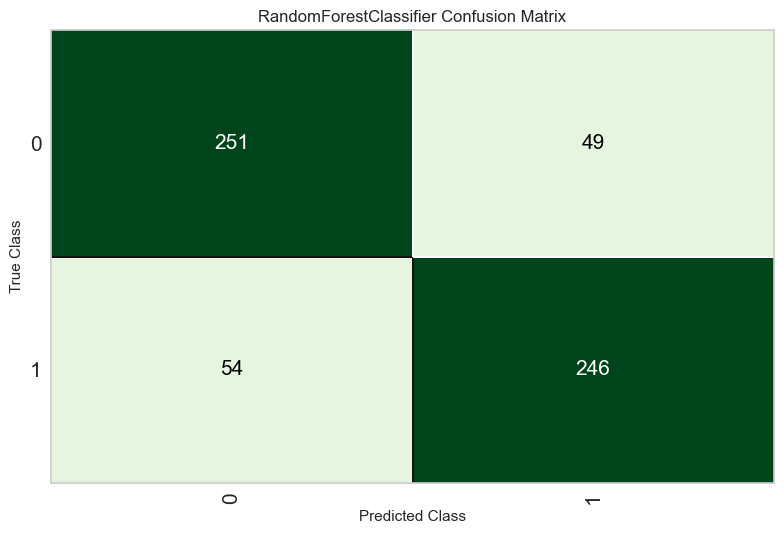

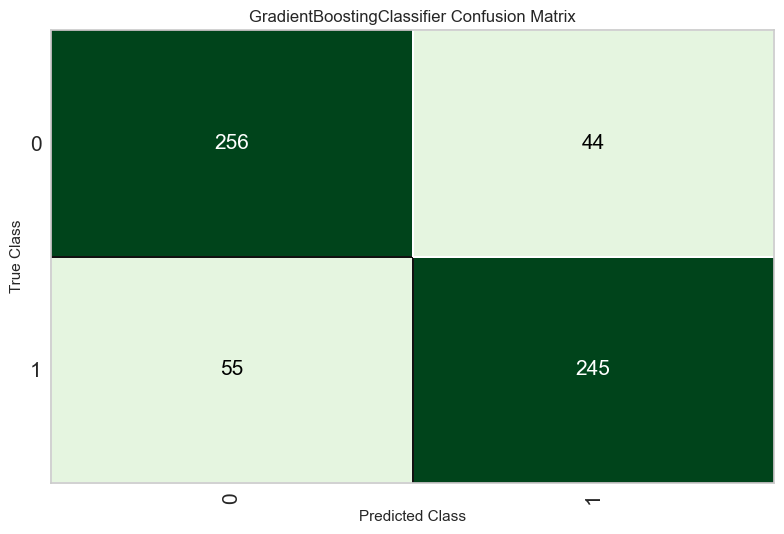

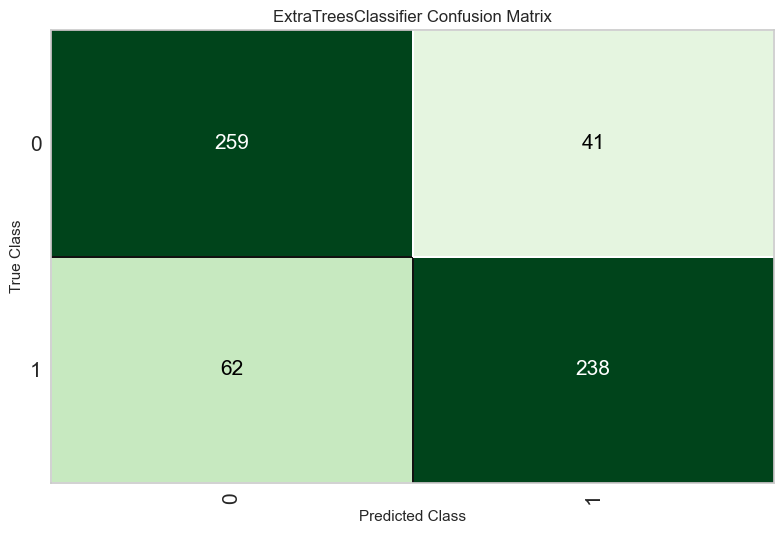

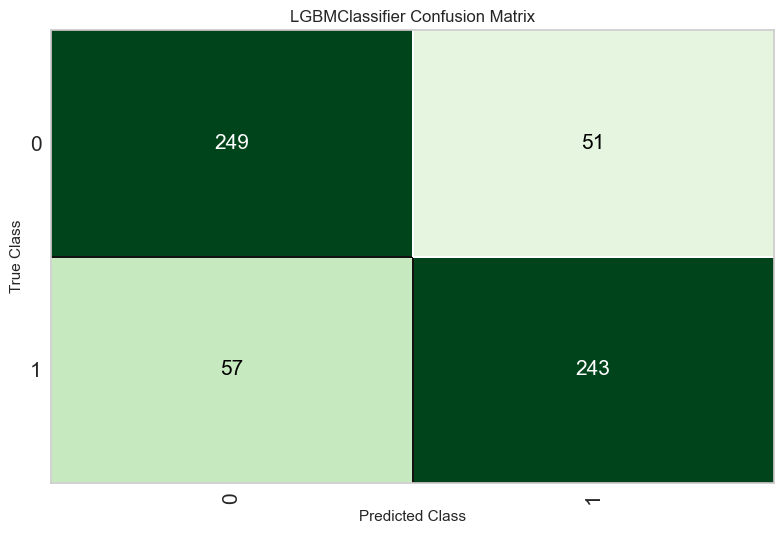

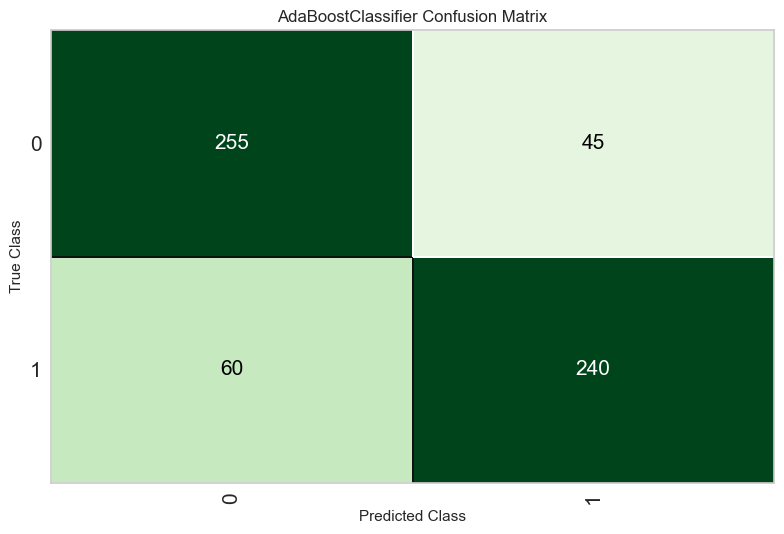

In [42]:
for b in best:
  plot_model(b, plot = 'confusion_matrix')

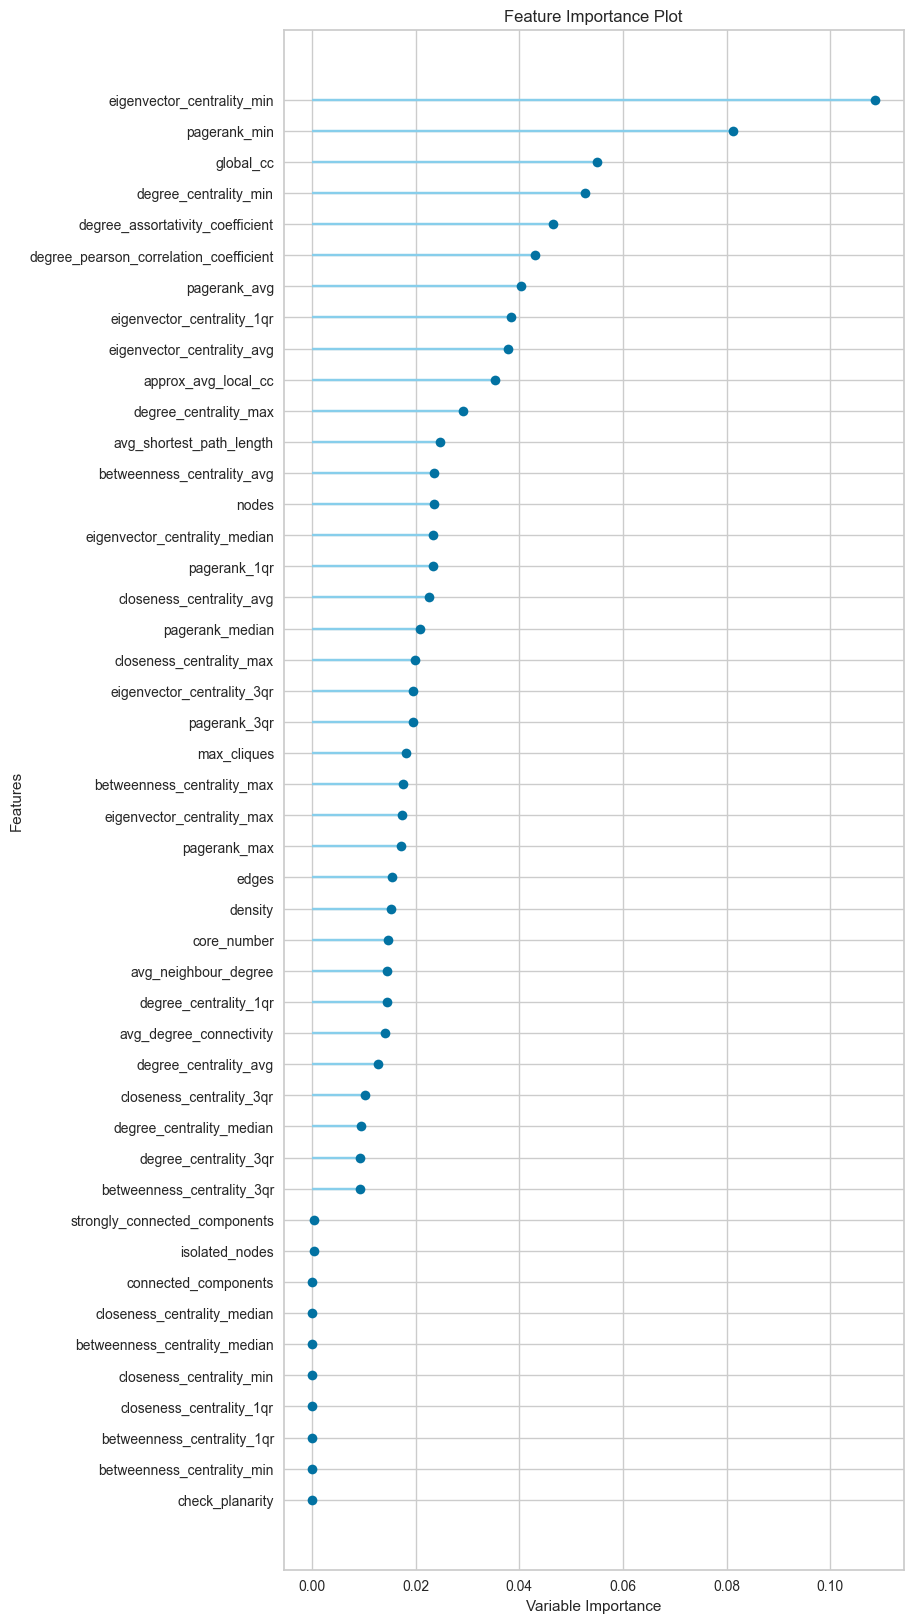

In [43]:
for b in best:
  plot_model(b, plot = 'feature_all')
  break

In [ ]:
for b in best:
  evaluate_model(b)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
import seaborn as sns

cor = X.iloc[:, :].corr().dropna(axis=1, how='all').dropna(axis=0, how='all')
cor

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,pagerank_max,pagerank_avg,betweenness_centrality_median,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg
nodes,1.000000,0.895882,-0.683042,0.210459,0.494009,-0.517549,-0.123948,0.695657,0.215290,0.215290,...,-0.604201,-0.926496,-0.039638,-0.284811,0.148118,-0.778707,-0.039715,-0.285218,0.148201,-0.778474
edges,0.895882,1.000000,-0.334929,0.136046,0.741088,-0.270019,-0.083970,0.587519,0.118985,0.118985,...,-0.750587,-0.812379,-0.013721,-0.185174,-0.116245,-0.877598,-0.013494,-0.186330,-0.115833,-0.877416
density,-0.683042,-0.334929,1.000000,-0.197885,0.122910,0.712134,0.173492,-0.505803,-0.208781,-0.208781,...,0.074801,0.726211,0.117946,0.315004,-0.529363,0.186749,0.119360,0.313527,-0.529050,0.186793
isolated_nodes,0.210459,0.136046,-0.197885,1.000000,0.111469,-0.051758,0.021159,0.129472,0.774547,0.774547,...,-0.092063,-0.177580,-0.007198,-0.082451,0.091081,-0.135230,-0.007144,-0.081816,0.091539,-0.135037
core_number,0.494009,0.741088,0.122910,0.111469,1.000000,0.305335,0.237609,0.155095,0.093377,0.093377,...,-0.679157,-0.454823,0.023306,-0.156176,-0.233155,-0.709472,0.024133,-0.156799,-0.232512,-0.709400
global_cc,-0.517549,-0.270019,0.712134,-0.051758,0.305335,1.000000,0.602700,-0.571534,-0.059716,-0.059716,...,-0.001249,0.562880,0.061133,-0.013207,-0.154188,0.240582,0.062089,-0.013674,-0.153046,0.241214
approx_avg_local_cc,-0.123948,-0.083970,0.173492,0.021159,0.237609,0.602700,1.000000,-0.505758,0.028636,0.028636,...,0.121672,0.186025,-0.024698,-0.626145,0.248033,0.092683,-0.022872,-0.626243,0.248369,0.093705
max_cliques,0.695657,0.587519,-0.505803,0.129472,0.155095,-0.571534,-0.505758,1.000000,0.127591,0.127591,...,-0.367794,-0.586839,-0.005578,0.063471,0.013611,-0.474196,-0.006584,0.063516,0.013748,-0.473668
connected_components,0.215290,0.118985,-0.208781,0.774547,0.093377,-0.059716,0.028636,0.127591,1.000000,1.000000,...,-0.095606,-0.178115,-0.006533,-0.091754,0.080770,-0.165486,-0.006484,-0.090965,0.081652,-0.165109
strongly_connected_components,0.215290,0.118985,-0.208781,0.774547,0.093377,-0.059716,0.028636,0.127591,1.000000,1.000000,...,-0.095606,-0.178115,-0.006533,-0.091754,0.080770,-0.165486,-0.006484,-0.090965,0.081652,-0.165109


<Axes: >

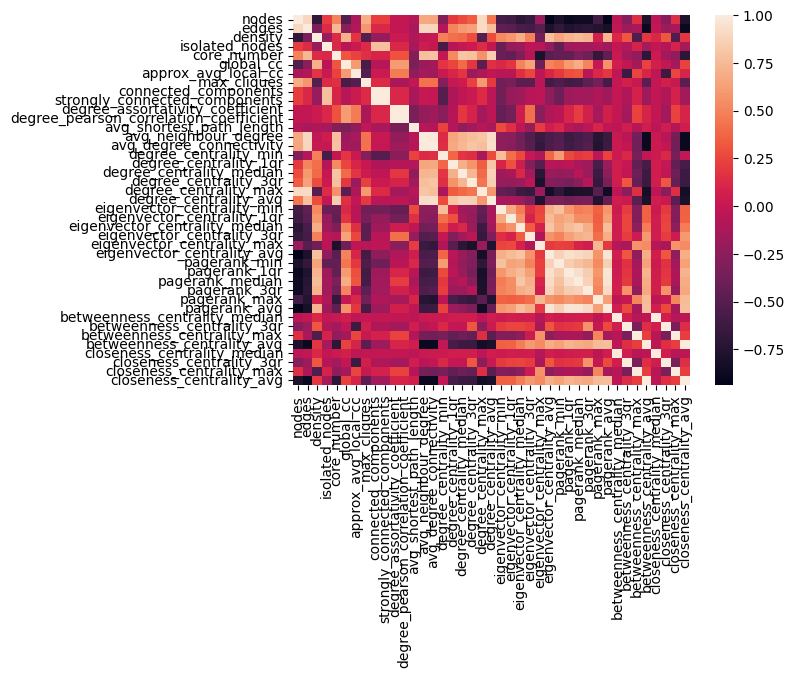

In [ ]:
sns.heatmap(cor, xticklabels=True, yticklabels=True)

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
nodes,2000.0,88.919000,21.826741,35.000000,74.000000,85.000000,100.000000,215.000000
edges,2000.0,1229.472000,451.486119,240.000000,935.750000,1144.500000,1419.000000,3804.000000
density,2000.0,0.321388,0.074844,0.137275,0.273464,0.315239,0.358651,0.828093
isolated_nodes,2000.0,0.058500,0.249216,0.000000,0.000000,0.000000,0.000000,2.000000
core_number,2000.0,26.686000,5.883767,12.000000,23.000000,26.000000,30.000000,73.000000
global_cc,2000.0,0.670415,0.057357,0.504935,0.633819,0.665035,0.698373,0.976636
approx_avg_local_cc,2000.0,0.887569,0.019798,0.826601,0.874666,0.886334,0.899090,0.985775
max_cliques,2000.0,20.692000,16.000411,2.000000,11.000000,16.000000,25.000000,169.000000
connected_components,2000.0,1.083500,0.391924,1.000000,1.000000,1.000000,1.000000,10.000000
strongly_connected_components,2000.0,1.083500,0.391924,1.000000,1.000000,1.000000,1.000000,10.000000


In [ ]:
X.describe().T.to_csv('stats-topo-modified.csv', header=True, index=False)

## Hybrid 2000

In [58]:
import pandas as pd
import numpy as np

FILE_PATH = '../data/topological_analysis-modified.csv'
df = pd.read_csv(FILE_PATH).iloc[:, 2:-1]
df

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,betweenness_centrality_3qr,betweenness_centrality_max,betweenness_centrality_avg,closeness_centrality_min,closeness_centrality_1qr,closeness_centrality_median,closeness_centrality_3qr,closeness_centrality_max,closeness_centrality_avg,check_planarity
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.000000,0.121950,0.008936,0.0,0.0,0.0,0.000000,0.126807,0.009004,False
1,78,1014,0.337662,0,23,0.644529,0.884952,16,1,1,...,0.002615,0.132920,0.008515,0.0,0.0,0.0,0.002998,0.131943,0.008522,False
2,71,932,0.375050,0,25,0.714891,0.902158,7,1,1,...,0.001453,0.148027,0.008803,0.0,0.0,0.0,0.001464,0.147678,0.008792,False
3,71,883,0.355332,0,22,0.687805,0.889368,9,1,1,...,0.004230,0.104146,0.009057,0.0,0.0,0.0,0.004335,0.102705,0.009083,False
4,137,1964,0.210820,0,29,0.598396,0.892383,56,2,2,...,0.000000,0.188770,0.005653,0.0,0.0,0.0,0.000000,0.186469,0.005619,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,96,1207,0.264693,0,34,0.747049,0.947891,9,1,1,...,0.000000,0.193186,0.008310,0.0,0.0,0.0,0.000000,0.193790,0.008264,False
1996,139,2153,0.224481,0,32,0.568339,0.886476,47,1,1,...,0.000000,0.150328,0.005585,0.0,0.0,0.0,0.000000,0.148329,0.005584,False
1997,112,1434,0.230695,0,26,0.640858,0.908929,14,1,1,...,0.000000,0.197323,0.007166,0.0,0.0,0.0,0.000000,0.196277,0.007177,False
1998,84,1723,0.494263,0,41,0.809736,0.922427,6,1,1,...,0.000000,0.095988,0.005975,0.0,0.0,0.0,0.000000,0.098080,0.006076,False


In [47]:
df2 = pd.read_csv('../data/taaco-output.csv').iloc[:, 1:]
df2

,lemma_ttr,lemma_mattr,lexical_density_tokens,lexical_density_types,content_ttr,verb_ttr,argument_ttr,adjacent_overlap_all_sent,adjacent_overlap_all_sent_div_seg,adjacent_overlap_binary_all_sent,...,all_additive,all_logical,positive_logical,negative_logical,all_temporal,positive_intentional,all_positive,all_negative,all_connective,label
0,0.608974,0.826542,0.666667,0.768421,0.701923,0.782609,0.672414,0.236641,4.428571,1.000000,...,0.051282,0.025641,0.012821,0.000000,0.000000,0.000000,0.076923,0.006410,0.064103,ai
1,0.524390,0.748000,0.646341,0.813953,0.660377,0.774194,0.653846,0.247788,5.600000,1.000000,...,0.054878,0.036585,0.006098,0.000000,0.006098,0.000000,0.060976,0.006098,0.067073,ai
2,0.562500,0.792973,0.606250,0.800000,0.742268,0.904762,0.567164,0.217054,4.666667,1.000000,...,0.056250,0.006250,0.000000,0.000000,0.000000,0.000000,0.062500,0.006250,0.068750,ai
3,0.529412,0.726000,0.680672,0.809524,0.629630,0.833333,0.489796,0.259259,5.250000,1.000000,...,0.033613,0.033613,0.008403,0.000000,0.000000,0.000000,0.050420,0.000000,0.042017,ai
4,0.586957,0.729767,0.706522,0.814815,0.676923,0.647059,0.625000,0.253968,4.000000,1.000000,...,0.054348,0.021739,0.010870,0.000000,0.000000,0.000000,0.065217,0.000000,0.054348,ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.652406,0.810290,0.625668,0.795082,0.829060,0.920000,0.728571,0.126667,2.375000,0.875000,...,0.058824,0.021390,0.010695,0.005348,0.010695,0.000000,0.069519,0.005348,0.074866,human
1996,0.565789,0.765825,0.631579,0.802326,0.718750,0.875000,0.661017,0.333333,9.333333,1.000000,...,0.072368,0.019737,0.013158,0.000000,0.000000,0.000000,0.092105,0.000000,0.092105,human
1997,0.516484,0.748872,0.653846,0.787234,0.621849,0.720000,0.578947,0.293233,7.800000,1.000000,...,0.038462,0.010989,0.000000,0.000000,0.000000,0.005495,0.065934,0.000000,0.060440,human
1998,0.609023,0.775714,0.624060,0.777778,0.759036,0.875000,0.686275,0.195876,3.800000,1.000000,...,0.075188,0.052632,0.000000,0.000000,0.000000,0.000000,0.067669,0.022556,0.090226,human


In [48]:
df = pd.concat([df, df2], axis=1)
df

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,all_additive,all_logical,positive_logical,negative_logical,all_temporal,positive_intentional,all_positive,all_negative,all_connective,label
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.051282,0.025641,0.012821,0.000000,0.000000,0.000000,0.076923,0.006410,0.064103,ai
1,78,1014,0.337662,0,23,0.644529,0.884952,16,1,1,...,0.054878,0.036585,0.006098,0.000000,0.006098,0.000000,0.060976,0.006098,0.067073,ai
2,71,932,0.375050,0,25,0.714891,0.902158,7,1,1,...,0.056250,0.006250,0.000000,0.000000,0.000000,0.000000,0.062500,0.006250,0.068750,ai
3,71,883,0.355332,0,22,0.687805,0.889368,9,1,1,...,0.033613,0.033613,0.008403,0.000000,0.000000,0.000000,0.050420,0.000000,0.042017,ai
4,137,1964,0.210820,0,29,0.598396,0.892383,56,2,2,...,0.054348,0.021739,0.010870,0.000000,0.000000,0.000000,0.065217,0.000000,0.054348,ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,96,1207,0.264693,0,34,0.747049,0.947891,9,1,1,...,0.058824,0.021390,0.010695,0.005348,0.010695,0.000000,0.069519,0.005348,0.074866,human
1996,139,2153,0.224481,0,32,0.568339,0.886476,47,1,1,...,0.072368,0.019737,0.013158,0.000000,0.000000,0.000000,0.092105,0.000000,0.092105,human
1997,112,1434,0.230695,0,26,0.640858,0.908929,14,1,1,...,0.038462,0.010989,0.000000,0.000000,0.000000,0.005495,0.065934,0.000000,0.060440,human
1998,84,1723,0.494263,0,41,0.809736,0.922427,6,1,1,...,0.075188,0.052632,0.000000,0.000000,0.000000,0.000000,0.067669,0.022556,0.090226,human


In [49]:
# all columns except the label
X = df.drop(columns=['label'])
y = df['label']
X.head()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,unattended_demonstratives,all_additive,all_logical,positive_logical,negative_logical,all_temporal,positive_intentional,all_positive,all_negative,all_connective
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.012821,0.051282,0.025641,0.012821,0.0,0.000000,0.0,0.076923,0.006410,0.064103
1,78,1014,0.337662,0,23,0.644529,0.884952,16,1,1,...,0.012195,0.054878,0.036585,0.006098,0.0,0.006098,0.0,0.060976,0.006098,0.067073
2,71,932,0.375050,0,25,0.714891,0.902158,7,1,1,...,0.006250,0.056250,0.006250,0.000000,0.0,0.000000,0.0,0.062500,0.006250,0.068750
3,71,883,0.355332,0,22,0.687805,0.889368,9,1,1,...,0.000000,0.033613,0.033613,0.008403,0.0,0.000000,0.0,0.050420,0.000000,0.042017
4,137,1964,0.210820,0,29,0.598396,0.892383,56,2,2,...,0.010870,0.054348,0.021739,0.010870,0.0,0.000000,0.0,0.065217,0.000000,0.054348


In [50]:
X.tail()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,unattended_demonstratives,all_additive,all_logical,positive_logical,negative_logical,all_temporal,positive_intentional,all_positive,all_negative,all_connective
1995,96,1207,0.264693,0,34,0.747049,0.947891,9,1,1,...,0.010695,0.058824,0.021390,0.010695,0.005348,0.010695,0.000000,0.069519,0.005348,0.074866
1996,139,2153,0.224481,0,32,0.568339,0.886476,47,1,1,...,0.006579,0.072368,0.019737,0.013158,0.000000,0.000000,0.000000,0.092105,0.000000,0.092105
1997,112,1434,0.230695,0,26,0.640858,0.908929,14,1,1,...,0.005495,0.038462,0.010989,0.000000,0.000000,0.000000,0.005495,0.065934,0.000000,0.060440
1998,84,1723,0.494263,0,41,0.809736,0.922427,6,1,1,...,0.000000,0.075188,0.052632,0.000000,0.000000,0.000000,0.000000,0.067669,0.022556,0.090226
1999,97,1428,0.306701,0,32,0.658446,0.889961,26,1,1,...,0.015464,0.041237,0.005155,0.000000,0.000000,0.000000,0.005155,0.056701,0.000000,0.056701


In [56]:
print(df.columns)

Index(['nodes', 'edges', 'density', 'isolated_nodes', 'core_number',
       'global_cc', 'approx_avg_local_cc', 'max_cliques',
       'connected_components', 'strongly_connected_components',
       ...
       'all_additive', 'all_logical', 'positive_logical', 'negative_logical',
       'all_temporal', 'positive_intentional', 'all_positive', 'all_negative',
       'all_connective', 'label'],
      dtype='object', length=103)


In [59]:
y.head(), y.tail()

(0    ai
 1    ai
 2    ai
 3    ai
 4    ai
 Name: label, dtype: object,
 1995    human
 1996    human
 1997    human
 1998    human
 1999    human
 Name: label, dtype: object)

In [60]:
X = X.dropna(axis=1)
X.head()

,nodes,edges,density,isolated_nodes,core_number,global_cc,approx_avg_local_cc,max_cliques,connected_components,strongly_connected_components,...,unattended_demonstratives,all_additive,all_logical,positive_logical,negative_logical,all_temporal,positive_intentional,all_positive,all_negative,all_connective
0,78,905,0.301365,0,22,0.682941,0.894418,12,1,1,...,0.012821,0.051282,0.025641,0.012821,0.0,0.000000,0.0,0.076923,0.006410,0.064103
1,78,1014,0.337662,0,23,0.644529,0.884952,16,1,1,...,0.012195,0.054878,0.036585,0.006098,0.0,0.006098,0.0,0.060976,0.006098,0.067073
2,71,932,0.375050,0,25,0.714891,0.902158,7,1,1,...,0.006250,0.056250,0.006250,0.000000,0.0,0.000000,0.0,0.062500,0.006250,0.068750
3,71,883,0.355332,0,22,0.687805,0.889368,9,1,1,...,0.000000,0.033613,0.033613,0.008403,0.0,0.000000,0.0,0.050420,0.000000,0.042017
4,137,1964,0.210820,0,29,0.598396,0.892383,56,2,2,...,0.010870,0.054348,0.021739,0.010870,0.0,0.000000,0.0,0.065217,0.000000,0.054348


In [61]:
X.shape

(2000, 102)

In [62]:
X.columns

Index(['nodes', 'edges', 'density', 'isolated_nodes', 'core_number',
       'global_cc', 'approx_avg_local_cc', 'max_cliques',
       'connected_components', 'strongly_connected_components',
       ...
       'unattended_demonstratives', 'all_additive', 'all_logical',
       'positive_logical', 'negative_logical', 'all_temporal',
       'positive_intentional', 'all_positive', 'all_negative',
       'all_connective'],
      dtype='object', length=102)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 102), (400, 102), (1600,), (400,))

In [64]:
from pycaret.classification import *
s = setup(pd.concat([X, y], axis=1), target = 'label', session_id = 123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"ai: 0, human: 1"
4,Original data shape,"(2000, 103)"
5,Transformed data shape,"(2000, 103)"
6,Transformed train set shape,"(1400, 103)"
7,Transformed test set shape,"(600, 103)"
8,Numeric features,101
9,Preprocess,True


In [65]:
best = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9314,0.9756,0.9314,0.9347,0.9313,0.8629,0.8661,0.0170
ada,Ada Boost Classifier,0.9150,0.9700,0.9150,0.9160,0.9149,0.8300,0.8310,0.2200
lightgbm,Light Gradient Boosting Machine,0.9143,0.9720,0.9143,0.9154,0.9142,0.8286,0.8297,0.7010
gbc,Gradient Boosting Classifier,0.9129,0.9730,0.9129,0.9145,0.9128,0.8257,0.8274,0.8580
rf,Random Forest Classifier,0.8957,0.9571,0.8957,0.8981,0.8955,0.7914,0.7939,0.2480
ridge,Ridge Classifier,0.8950,0.0000,0.8950,0.9007,0.8946,0.7900,0.7957,0.0130
et,Extra Trees Classifier,0.8893,0.9591,0.8893,0.8929,0.8890,0.7786,0.7822,0.0850
nb,Naive Bayes,0.8500,0.9271,0.8500,0.8555,0.8494,0.7000,0.7055,0.0120
lr,Logistic Regression,0.8486,0.9240,0.8486,0.8519,0.8482,0.6971,0.7005,0.6220
dt,Decision Tree Classifier,0.8207,0.8207,0.8207,0.8227,0.8205,0.6414,0.6434,0.0530


In [66]:
for b in best:
  print(b)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                 

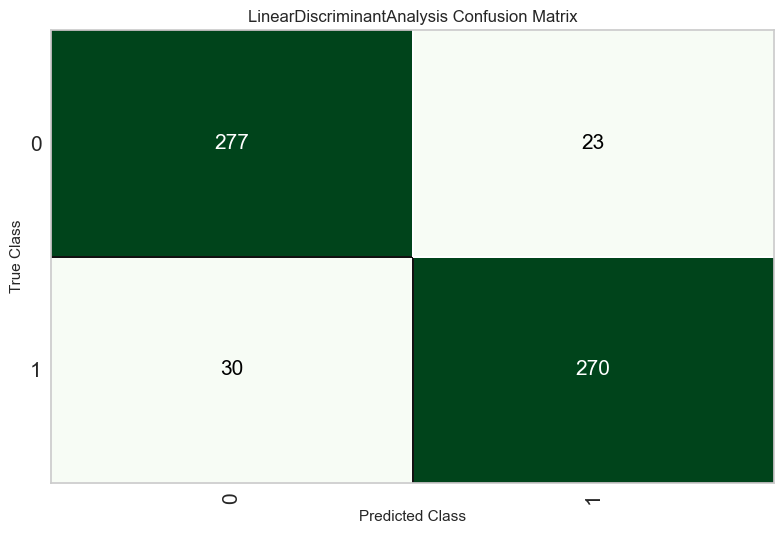

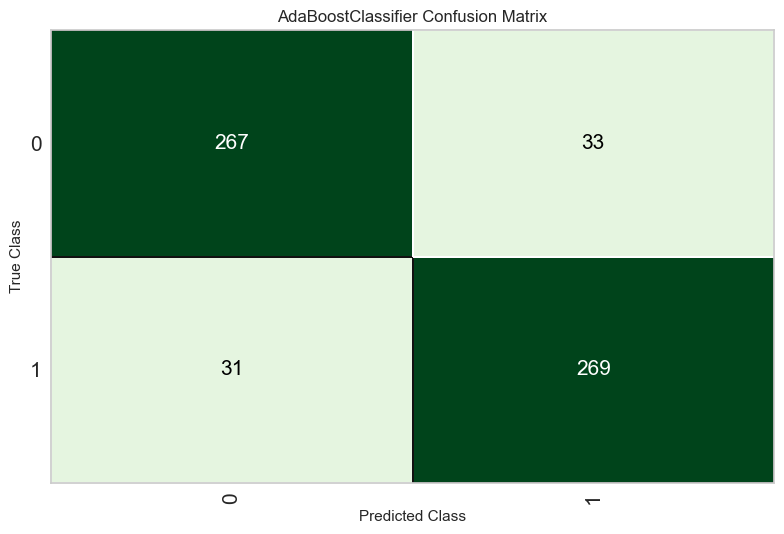

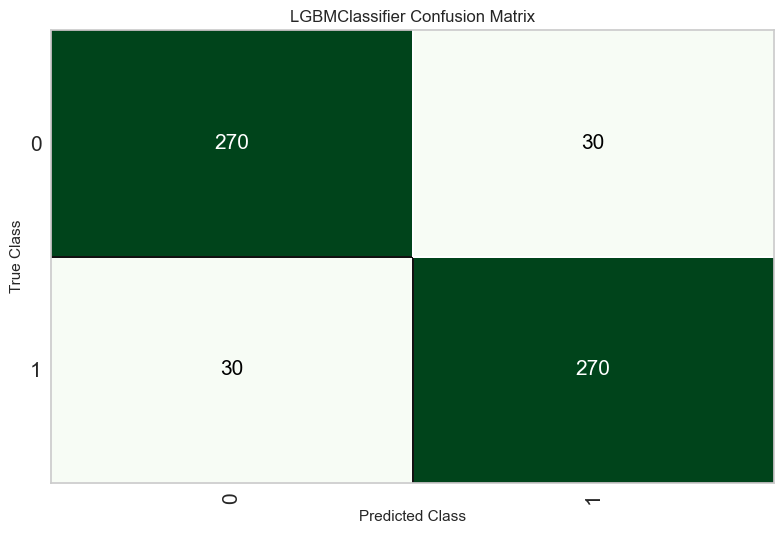

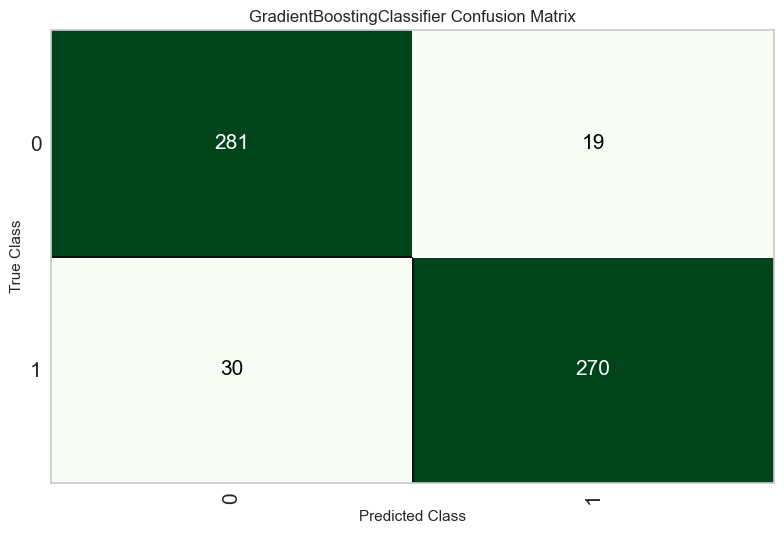

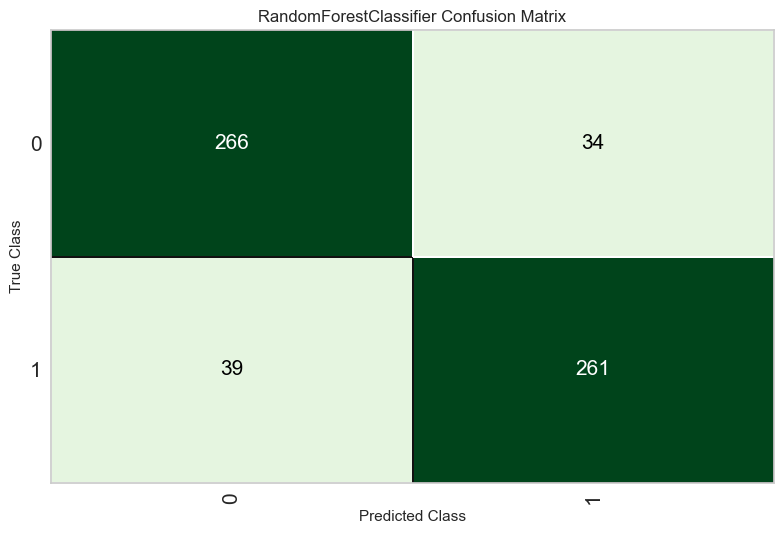

In [67]:
for b in best:
  plot_model(b, plot = 'confusion_matrix')

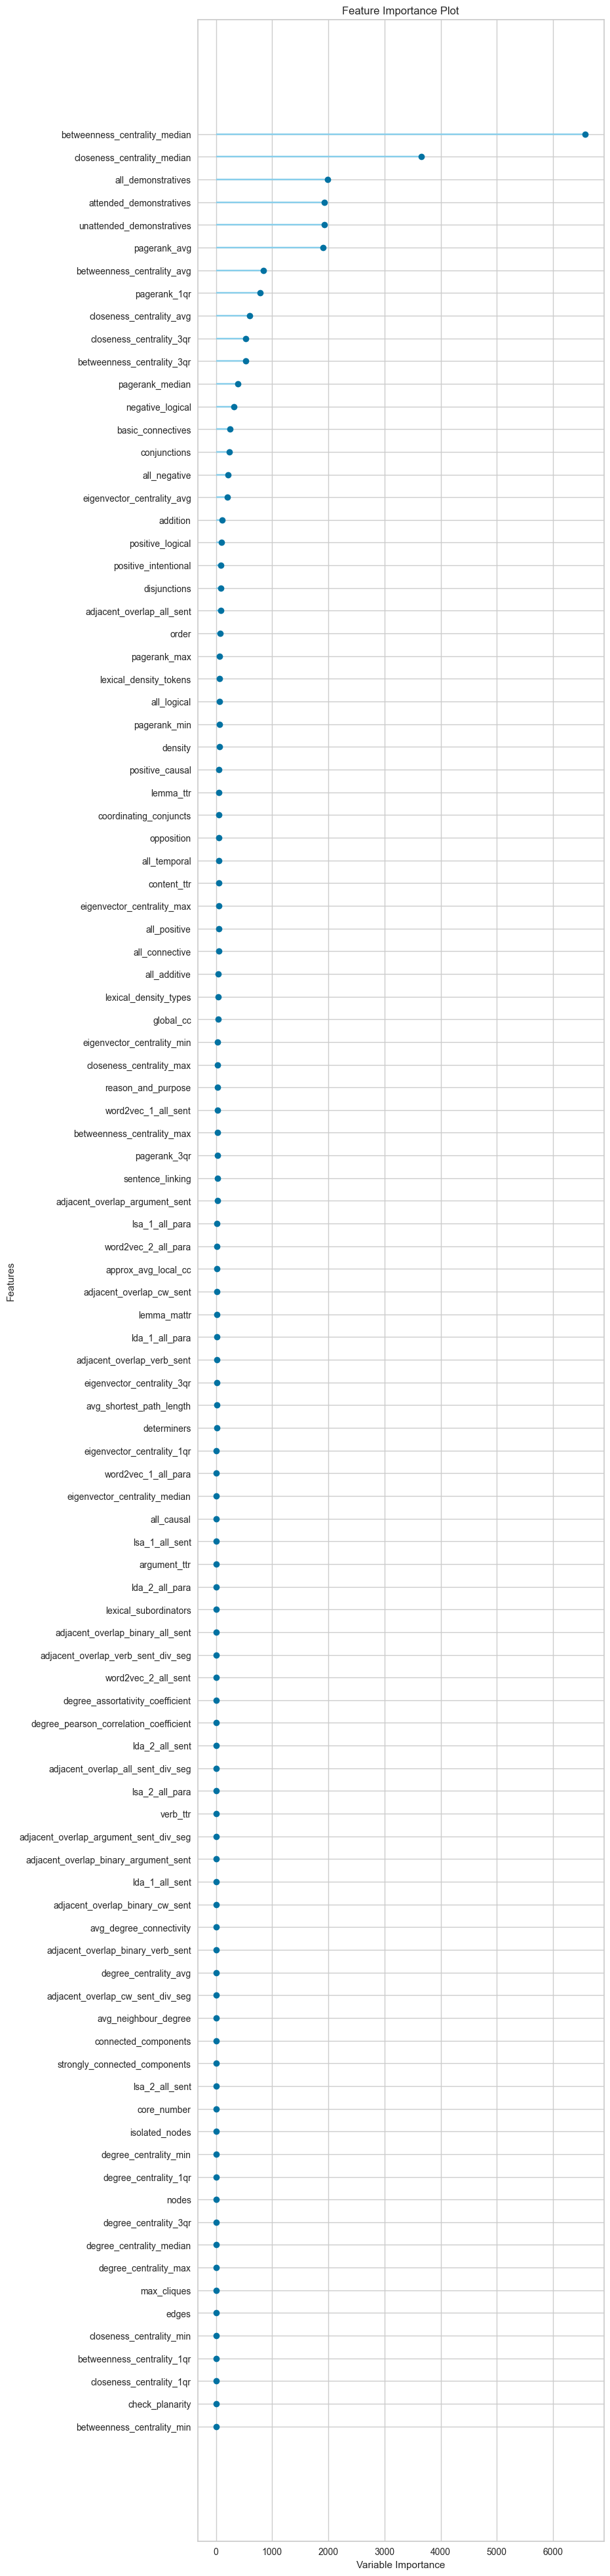

In [68]:
for b in best:
  plot_model(b, plot = 'feature_all')
  break